# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [2]:
# Add code here 🔧

#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read csv file
df=pd.read_csv("/content/cleaned_airbnb_data.csv")

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_scores_rating_filled,review_scores_rating_missing
0,37676,https://www.airbnb.com/rooms/37676,20250617033039,2025-06-17,city scrape,Mt. Hood View in the Pearl District,"This rare and relaxing 1,000 SF loft is locate...",https://a0.muscache.com/pictures/212298/16fb6b...,162158,https://www.airbnb.com/users/show/162158,...,4.68,NaN,f,1.0,1.0,0.0,0.0,0.73,4.89,False
1,61893,https://www.airbnb.com/rooms/61893,20250617033039,2025-06-17,city scrape,Perfect Portland Place,Amazing for a long stay in<br />Portland's per...,https://a0.muscache.com/pictures/miso/Hosting-...,300391,https://www.airbnb.com/users/show/300391,...,4.92,NaN,f,1.0,1.0,0.0,0.0,0.24,5.00,False
2,67036,https://www.airbnb.com/rooms/67036,20250617033039,2025-06-17,city scrape,Historic Home Located in Central City,"Welcome to Multnomah House, a classic Portland...",https://a0.muscache.com/pictures/miso/Hosting-...,329777,https://www.airbnb.com/users/show/329777,...,4.83,12-123170-000-00-LU,f,1.0,1.0,0.0,0.0,0.44,4.95,False
3,77522,https://www.airbnb.com/rooms/77522,20250617033039,2025-06-17,city scrape,Spacious Suite in Eastmoreland/SE. Hot Tub Dog...,Our private spacious suite is in a beautiful r...,https://a0.muscache.com/pictures/miso/Hosting-...,345461,https://www.airbnb.com/users/show/345461,...,4.86,14-227531-000-00-HO,f,1.0,1.0,0.0,0.0,0.85,4.84,False
4,93613,https://www.airbnb.com/rooms/93613,20250617033039,2025-06-17,city scrape,Sunny Queen Room in FUN Alberta Arts,Peaceful home in vibrant Alberta Arts neighbor...,https://a0.muscache.com/pictures/d8e34f6a-be4d...,501715,https://www.airbnb.com/users/show/501715,...,4.45,NaN,f,11.0,3.0,8.0,0.0,0.40,4.51,False


In [3]:
df.shape

(2392, 77)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2392 non-null   int64  
 1   listing_url                                   2392 non-null   object 
 2   scrape_id                                     2392 non-null   int64  
 3   last_scraped                                  2392 non-null   object 
 4   source                                        2392 non-null   object 
 5   name                                          2392 non-null   object 
 6   description                                   2363 non-null   object 
 7   picture_url                                   2392 non-null   object 
 8   host_id                                       2392 non-null   int64  
 9   host_url                                      2392 non-null   o

In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_scores_rating_filled
count,2.392000e+03,2.392000e+03,2.392000e+03,2390.000000,2390.000000,2391.000000,2391.000000,2391.000000,1992.000000,2295.000000,...,2329.000000,2329.000000,2329.000000,2329.000000,2391.000000,2391.000000,2391.000000,2391.000000,2329.000000,2391.000000
mean,1.375774e+16,2.025062e+13,7.031424e+07,6.844351,10.539331,45.529087,-122.651070,3.442493,1.262048,1.417429,...,4.944204,4.939098,4.878965,4.823310,2.683814,2.150983,0.440820,0.009201,2.192357,4.882576
std,8.655636e+16,8.126699e-01,1.010141e+08,49.155940,99.713327,0.033372,0.044318,1.992858,0.722116,1.000894,...,0.107518,0.105641,0.154780,0.161371,4.126806,3.878192,1.472108,0.122385,2.147463,0.148922
min,3.767600e+04,2.025062e+13,1.618000e+03,1.000000,1.000000,45.434420,-122.832860,1.000000,0.000000,0.000000,...,3.000000,3.500000,3.000000,2.500000,1.000000,0.000000,0.000000,0.000000,0.010000,2.500000
25%,1.372627e+07,2.025062e+13,5.771806e+06,1.000000,1.000000,45.507905,-122.681565,2.000000,1.000000,1.000000,...,4.930000,4.930000,4.850000,4.780000,1.000000,1.000000,0.000000,0.000000,0.470000,4.850000
50%,2.615296e+07,2.025062e+13,2.390435e+07,1.000000,2.000000,45.527900,-122.650690,3.000000,1.000000,1.000000,...,4.970000,4.970000,4.920000,4.860000,1.000000,1.000000,0.000000,0.000000,1.560000,4.920000
75%,4.334140e+07,2.025062e+13,9.205671e+07,3.000000,4.000000,45.556115,-122.623338,4.000000,1.000000,2.000000,...,4.990000,4.990000,4.970000,4.920000,2.000000,2.000000,0.000000,0.000000,3.310000,4.970000
max,5.762845e+17,2.025062e+13,6.749901e+08,1223.000000,2693.000000,45.615960,-122.484131,16.000000,12.000000,9.000000,...,5.000000,5.000000,5.000000,5.000000,29.000000,29.000000,12.000000,2.000000,23.780000,5.000000


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



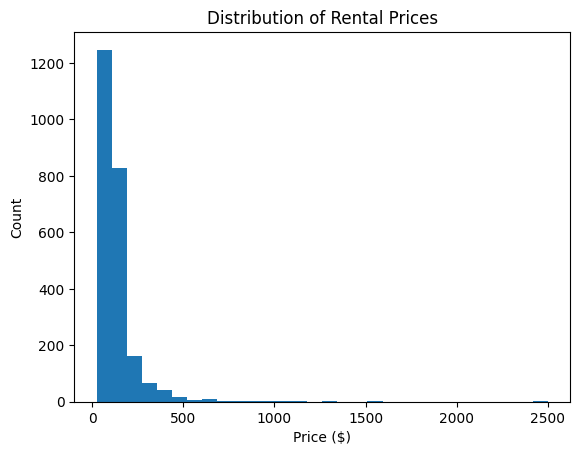

In [6]:
# Add code here 🔧

plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

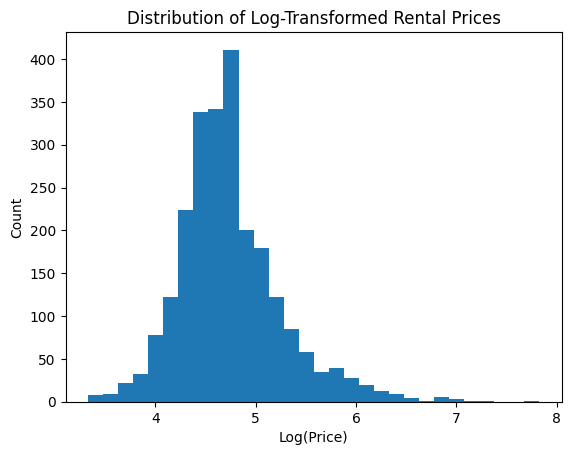

In [7]:
# log transformation to 'price'
df['price_log'] = np.log1p(df['price'])

# Plot the histogram of the transformed price
plt.hist(df['price_log'], bins=30)
plt.title("Distribution of Log-Transformed Rental Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()

### ✍️ Your Response: 🔧
1. The first graph all the postings were all within in the 0-100 values. Whereas, when I transformed the rental price using the log method it distributed all the postings within 2-8.

2. I used log scaling because it expanded on the range of smaller values and compressed  the values on the larger side. It also significantly reduces outliers and skewed distribution.

3. It expanded on the smaller values and ensured the reduce the likelyhood of outliers. On the first graph you can see the outlier of 40,000 not allowing the bulk of the listings to show their price.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale
df['price_min_max'] = MinMaxScaler().fit_transform(df[['price']])

# Z-score scale
df['minimum_nights_zscore'] = StandardScaler().fit_transform(df[['minimum_nights']])

#compare both columns
df[['price','price_min_max','minimum_nights', 'minimum_nights_zscore']].describe()

,price,price_min_max,minimum_nights,minimum_nights_zscore
count,2391.000000,2391.000000,2391.000000,2.391000e+03
mean,134.092430,0.043305,13.662903,-8.915216e-18
std,116.042699,0.046924,24.181395,1.000209e+00
min,27.000000,0.000000,1.000000,-5.237726e-01
25%,83.000000,0.022645,2.000000,-4.824098e-01
50%,108.000000,0.032754,2.000000,-4.824098e-01
75%,145.000000,0.047715,30.000000,6.757474e-01
max,2500.000000,1.000000,730.000000,2.962968e+01


### ✍️ Your Response: 🔧
1. I scaled price column using the min-max and for minimum_nights i used the Z score.

2. These values are useful when comparing or modeling variables with significantly different ranges, this would put them  on a similar scare. Ensuring that higher values would not dominate the analysis.

3. The Airbnb analyst would benefit from this when creating a predictive model for pricing or demand forecasting since both these columns have differing values.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [30]:
# review binning
bin = [0, 28, 264, 1800] # Adjusted bin edges to have one more edge than labels
labels = ['Low','Medium','High']
df['review_bin'] = pd.cut(df['number_of_reviews'], bins=bin, labels=labels)

df['review_bin'].value_counts()

,count
review_bin,
Medium,1190
High,596
Low,543


### ✍️ Your Response: 🔧
1. I binned number_of_reviews by three categories. I binned them based off the 1Q and 3Q in order to ensure the distribution isn't skewed to the right.

2. Having the number of reviews grouped allows a customer to make a quick decision on a booking rental without having to interpert a number count themselves. It's easier to interpert, high review count usually means theres high occupancy.
3. Marketing teams who are wanting to promote rentals that have a "High" review count. It'll be easier to visualize top performing listings and provide incentives for good service.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [55]:
# Fill missing values in 'estimated_revenue_l365d' and 'estimated_occupancy_l365d' with their medians
df_filled = df[['estimated_revenue_l365d', 'estimated_occupancy_l365d']].fillna({
    'estimated_revenue_l365d': df['estimated_revenue_l365d'].median(),
    'estimated_occupancy_l365d': df['estimated_occupancy_l365d'].median()
})
# Display the head of the filled dataframe to verify
display(df_filled.head())

,estimated_revenue_l365d,estimated_occupancy_l365d
0,15000.0,120.0
1,16800.0,120.0
2,52088.0,136.0
3,19380.0,255.0
4,0.0,0.0


In [58]:
# Add code here 🔧

#price/nights minimum ratio
df['effective_price_per_night'] = df_filled['estimated_revenue_l365d'] / df_filled['estimated_occupancy_l365d']

# 'is_long_stay' flag per night (True if minimum_nights > 30)
df['is_long_stay'] = df['minimum_nights'] > 30

# Display the new columns along with the original columns for verification
display(df[['price', 'minimum_nights', 'price_per_night', 'is_long_stay']].head())

,price,minimum_nights,price_per_night,is_long_stay
0,125.0,30.0,125.0,False
1,140.0,30.0,140.0,False
2,383.0,4.0,383.0,False
3,76.0,31.0,76.0,True
4,54.0,30.0,54.0,False


### ✍️ Your Response: 🔧 🔧
1. I created a price per nights column and flag for 'longer stay' thats over 30 days. Price doesn't explicitly say  its per night so I used the estimated revenue of the last 365 days and estimated occupancy to calculate the price per night (which ended up being the same price as price alone). Additionally had to fill missing data to ensure all rows had values.

2. Host would use it to market to customers, their price per night could attract customers who are planning on having longer stays.

3. Helps those who are conscious of how much theyre paying per night and overall makes their decision making process more simpler.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [76]:
# Add code here 🔧

# One-hot encoding
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type').astype(int)

# Concatenate the new encoded columns with the original DataFrame
df = pd.concat([df, room_type_encoded], axis=1)




In [77]:
display(df[['room_type', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']].head())

,room_type,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Entire home/apt,1,0,0,0
1,Entire home/apt,1,0,0,0
2,Entire home/apt,1,0,0,0
3,Entire home/apt,1,0,0,0
4,Private room,0,0,1,0


### ✍️ Your Response: 🔧
1. I choose to encoded room type, its a categorical value that wouldn't have been able to be used in modeling or maching learning since it's not numeric. After running encoding I converted it to an integer that way its readily available for machine learning.
2. I used one hot encoding for room type.

3. Encoding room type would help with price modeling since the room type affects the pricing. For dashboards it would make it easier for filtering based on room type.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. Scaling and binning I felt provided the most help with upcoming predecitive modeling or dashboard creations. Scaling will help with comparing/modeling variables that significantly have different ranges and will allow an analyst to create a pricing or demand forecasting. Bining helps customers interpert the better rental based on the amount of reviews left.

2.  Scaling will be helpful for the analyst create pricing/ demand forecasting and binning for performance analysis. Hosts could use the price per night to provide competitive pricing.

3. Create a dashboard for travelers that shows prices based on room type and neighbourhood. As well as create a dashboard for hosts that shows the trends of pricing per room types to ensure that they have competitive pricing.

4. My customized learning outcome was to work on predecitive modeling. This assigment focused on data transformation which is the second step towards predictive modeling, changing column values to useful values.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [78]:
!jupyter nbconvert --to html "assignment_07_VelazquezAshley.ipynb"

[NbConvertApp] Converting notebook assignment_07_VelazquezAshley.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 415943 bytes to assignment_07_VelazquezAshley.html
